## Analisis Exploratorio de Datos (EDA)

### Importamos librerias

In [2]:
#Las librerias seleccionadas nos proveen herramientas para graficar y trabajar con datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

### Carga de datos

In [3]:
#Cargamos el dataframe que ya esta limpio luego del procesos de ETL
data = pd.read_csv('BBDD_hospitalizacion_limpio.csv')

### Exploracion 

In [4]:
#Vemos como quedo el data frame
data

,Edad,Diabetes,Hospitaliz_ultimo_mes,Psa,Biopsias_prev,Vol_prostatico,Antibiotico_profilaxis,Nro_muestras,Cup,Epoc,Biopsia,nro_dias_con_infecc,Fiebre,Itu,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion,Dias_hosp_mq,Dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [5]:
#Se reviso columnas, cantidades y tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    433 non-null    int64  
 1   Diabetes                433 non-null    object 
 2   Hospitaliz_ultimo_mes   433 non-null    object 
 3   Psa                     433 non-null    float64
 4   Biopsias_prev           433 non-null    object 
 5   Vol_prostatico          433 non-null    object 
 6   Antibiotico_profilaxis  433 non-null    object 
 7   Nro_muestras            433 non-null    int64  
 8   Cup                     433 non-null    object 
 9   Epoc                    433 non-null    object 
 10  Biopsia                 433 non-null    object 
 11  nro_dias_con_infecc     433 non-null    int64  
 12  Fiebre                  433 non-null    object 
 13  Itu                     433 non-null    object 
 14  Tipo_cultivo            433 non-null    ob

### Variables numericas

In [6]:
#Vemos la descripcion de las variables numericas, se realizaron visualizaciones para cada una de ellas
#Ademas veremos a traves de porcentajes si es que consideramos util una variable o no, nuestro limite de respuestas de una sola categoria sera del 98%
data.describe()

,Edad,Psa,Nro_muestras,nro_dias_con_infecc,Dias_hosp_mq,Dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


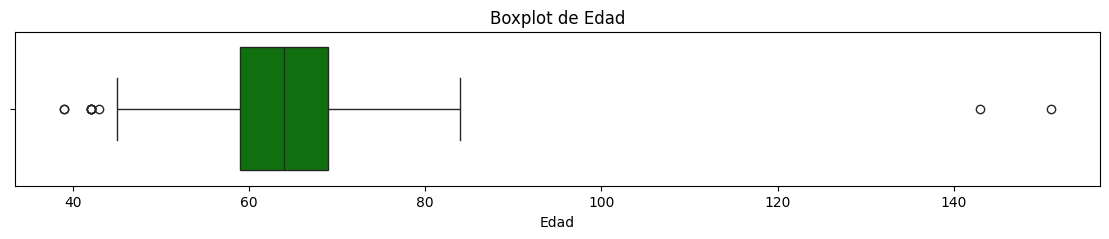

In [7]:
#En el notebook anterior observamos que edad tiene un maximo de 151 años, lo revisaremos con un boxplot
plt.figure(figsize=(14,2))
sns.boxplot(data=data,x='Edad',color='g')
plt.title('Boxplot de Edad')
plt.show()

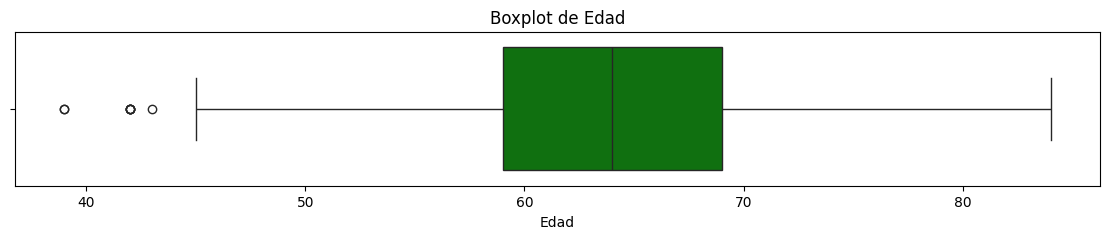

In [8]:
#Se observo dos cosas, hay dos valores atipicos de mas 140 años y 3 valores por debajo de los 45 años
#Aqui le aplicamos una mascara y borramos esos valores atipicos en la columna edad
data = data[data['Edad']<=100]
plt.figure(figsize=(14,2))
sns.boxplot(data=data,x='Edad',color='g')
plt.title('Boxplot de Edad')
plt.show()

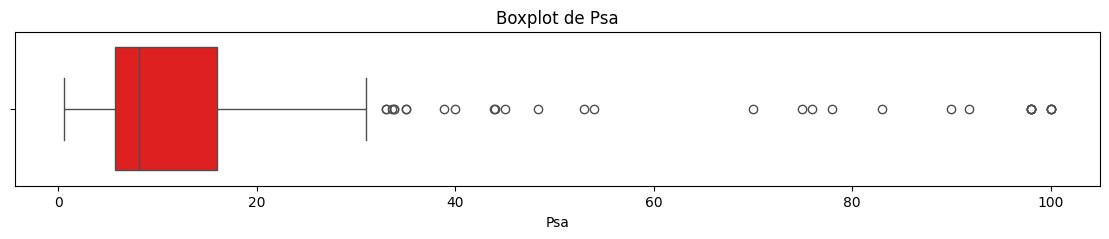

In [9]:
#Visualizamos Psa
plt.figure(figsize=(14,2))
sns.boxplot(data=data,x='Psa',color='r')
plt.title('Boxplot de Psa')
plt.show()

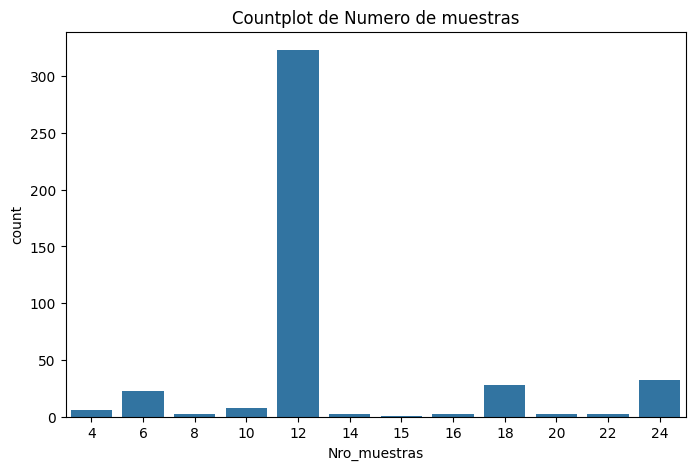

In [10]:
#Visualizamos el numero de muestras
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Nro_muestras')
plt.title('Countplot de Numero de muestras')
plt.show()

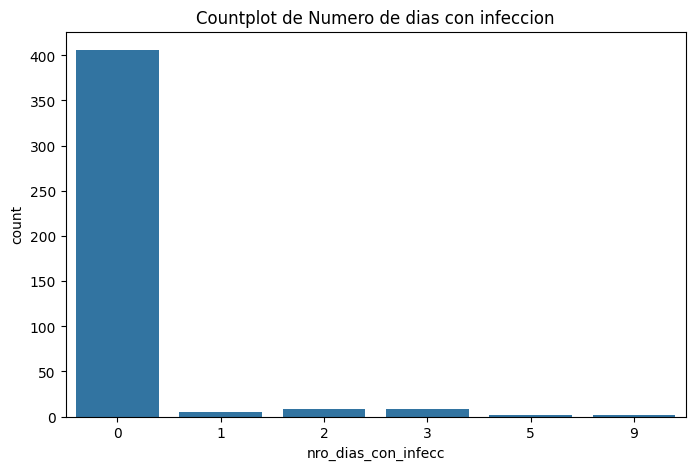

In [11]:
#Visualizamos cantidad de dias con infecciones
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='nro_dias_con_infecc')
plt.title('Countplot de Numero de dias con infeccion')
plt.show()

In [12]:
#Aqui se observan grandes valores para 0, entonces se reviso que porcentaje representaban para determinara si eliminamos o dejamos esa variable
conteo_infeccion =(data['nro_dias_con_infecc']==0).sum()
len_infeccion = len(data['nro_dias_con_infecc'])
print(f'Tenemos {round((conteo_infeccion/len_infeccion)*100,2)} % respuestas como "NO"')

Tenemos 94.2 % respuestas como "NO"


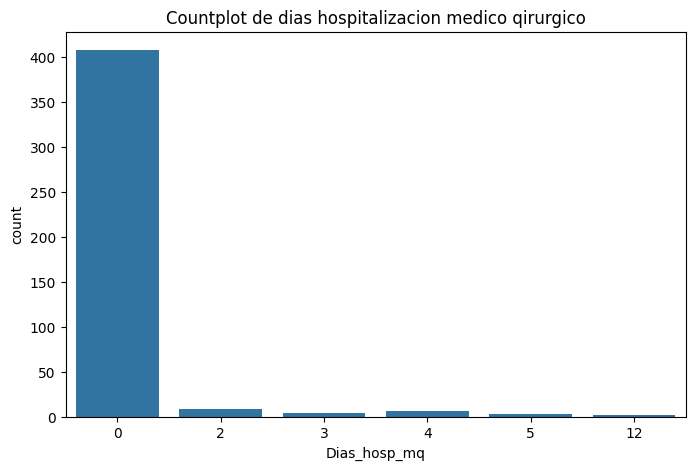

In [13]:
#Visualizamos dias de hospitalizacion medico quirurgico
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Dias_hosp_mq')
plt.title('Countplot de dias hospitalizacion medico qirurgico')
plt.show()

In [14]:
#Aqui se observan grandes valores para 0, entonces se reviso que porcentaje representaban para determinara si eliminamos o dejamos esa variable
conteo_dias_mq =(data['Dias_hosp_mq']==0).sum()
len_dias_mq = len(data['Dias_hosp_mq'])
print(f'Tenemos {round((conteo_dias_mq/len_dias_mq)*100,2)} % respuestas como "NO"')

Tenemos 94.66 % respuestas como "NO"


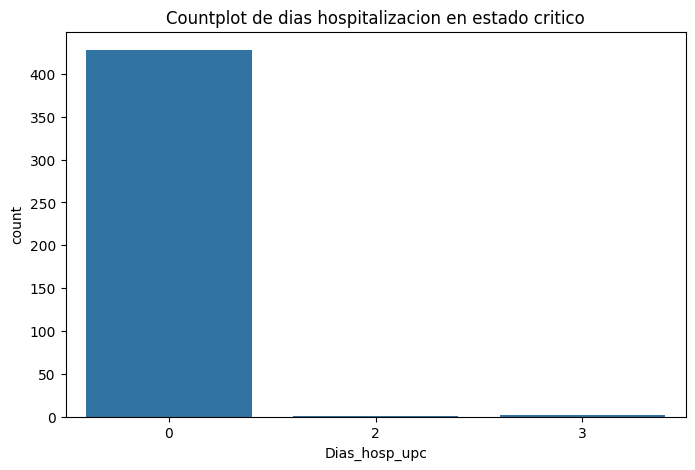

In [15]:
#Visualizamos dias de hospitalizacion en estado critico
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='Dias_hosp_upc')
plt.title('Countplot de dias hospitalizacion en estado critico')
plt.show()

In [16]:
#Esta variable indica un 99.3% de 0 dias, esto se lo interpreta como un "NO" ya que no pasaron por esa hospitalizacion en estado critico, a partir de esto es que decidimos borrar esta variable
conteo_dias_upc =(data['Dias_hosp_upc']==0).sum()
len_dias_upc = len(data['Dias_hosp_upc'])
print(f'Tenemos {round((conteo_dias_upc/len_dias_upc)*100,2)} % respuestas como "NO"')

data = data.drop(columns=['Dias_hosp_upc'])

Tenemos 99.3 % respuestas como "NO"


### Variables categoricas

In [17]:
#Se realizaron visualizaciones para todas las variables categoricas
#Ademas veremos a traves de porcentajes si es que consideramos util una variable o no, nuestro limite de respuestas como de una sola categoria sera del 98%
data.describe(include='object')

,Diabetes,Hospitaliz_ultimo_mes,Biopsias_prev,Vol_prostatico,Antibiotico_profilaxis,Cup,Epoc,Biopsia,Fiebre,Itu,Tipo_cultivo,Agente_aislado,Patron_resistencia,Hospitalizacion
count,431,431,431,431,431,431,431,431,431,431,431,431,431,431
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,380,427,387,306,344,428,417,211,395,425,423,423,424,408


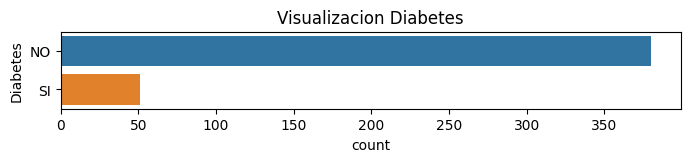

In [18]:
#Visualizamos los valores de diabetes
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Diabetes',hue='Diabetes')
plt.title('Visualizacion Diabetes')
plt.show()

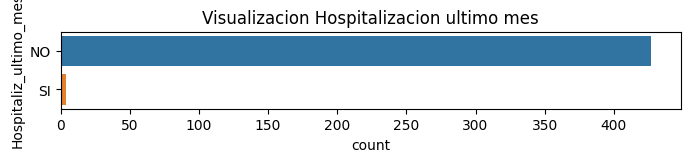

In [19]:
#Visualizamos si se hospitalizo el ultimo mes
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Hospitaliz_ultimo_mes',hue='Hospitaliz_ultimo_mes')
plt.title('Visualizacion Hospitalizacion ultimo mes')
plt.show()

In [20]:
#Esta variable indica un 99.07% de "NO", sera eliminada 
conteo_hosp_ult_mes =(data['Hospitaliz_ultimo_mes']=='NO').sum()
len_hos_ult_mes = len(data['Hospitaliz_ultimo_mes'])
print(f'Tenemos {round((conteo_hosp_ult_mes/len_hos_ult_mes)*100,2)} % respuestas como "NO"')

Tenemos 99.07 % respuestas como "NO"


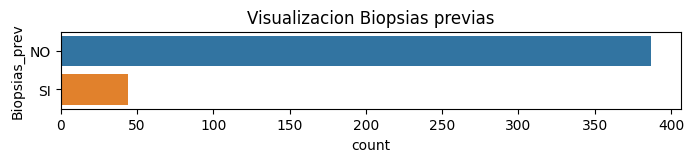

In [21]:
#Visualizamos si el paciente tenia biopsias previas
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Biopsias_prev',hue='Biopsias_prev')
plt.title('Visualizacion Biopsias previas')
plt.show()

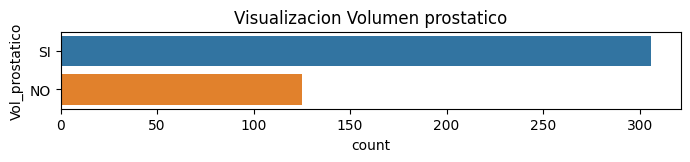

In [22]:
#Visualizamos el volumen prostatico
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Vol_prostatico',hue='Vol_prostatico')
plt.title('Visualizacion Volumen prostatico')
plt.show()

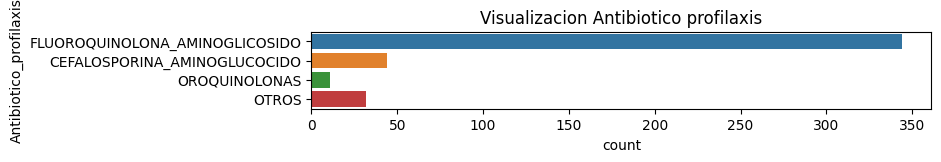

In [23]:
#Visualizamos el antibiotico utilizado en la profilaxis
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Antibiotico_profilaxis',hue='Antibiotico_profilaxis')
plt.title('Visualizacion Antibiotico profilaxis')
plt.show()

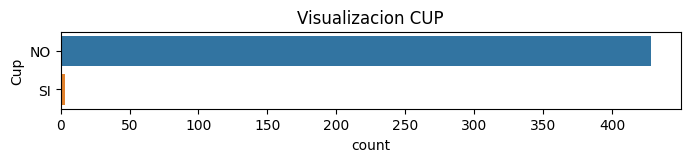

In [24]:
#Visualizamos CUP
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Cup',hue='Cup')
plt.title('Visualizacion CUP')
plt.show()

In [25]:
#Esta variable indica un 99.3% de "NO", sera eliminada 
conteo_cup =(data['Cup']=='NO').sum()
len_cup = len(data['Cup'])
print(f'Tenemos {round((conteo_cup/len_cup)*100,2)} % respuestas como "NO"')

Tenemos 99.3 % respuestas como "NO"


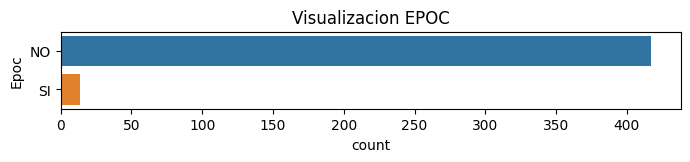

In [26]:
#Visualizamos EPOC
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Epoc',hue='Epoc')
plt.title('Visualizacion EPOC')
plt.show()

In [27]:
#Aqui se observan grandes valores para NO, se reviso que porcentaje representaban para determinar si eliminamos o dejamos esa variable
conteo_Epoc =(data['Epoc']=='NO').sum()
len_Epoc = len(data['Epoc'])
print(f'Tenemos {round((conteo_Epoc/len_Epoc)*100,2)} % respuestas como "NO"')

Tenemos 96.75 % respuestas como "NO"


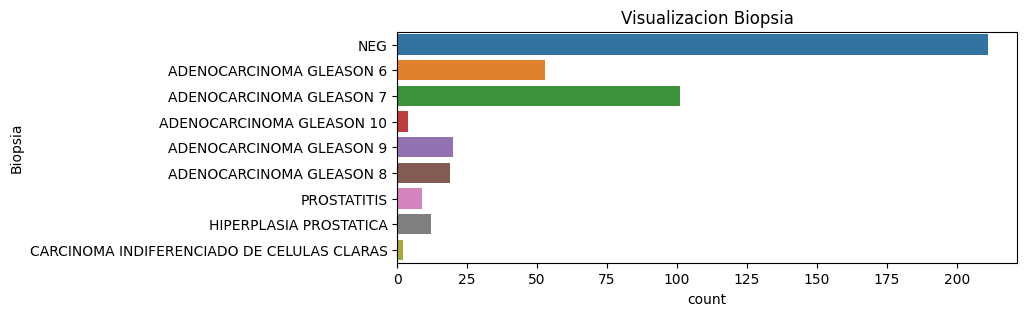

In [28]:
#Visualizamos los valores de Biopsia
plt.figure(figsize=(8,3))
sns.countplot(data=data,y='Biopsia',hue='Biopsia')
plt.title('Visualizacion Biopsia')
plt.show()

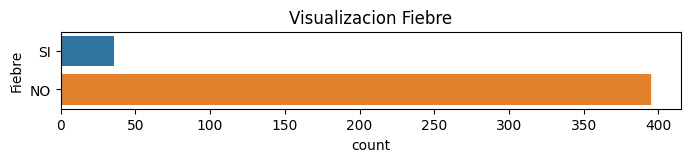

In [29]:
#Visualizamos los valores de fiebre
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Fiebre',hue='Fiebre')
plt.title('Visualizacion Fiebre')
plt.show()

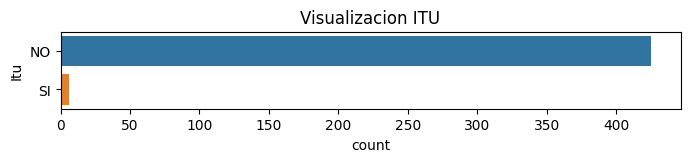

In [30]:
#Visualizamos los valores de ITU
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Itu',hue='Itu')
plt.title('Visualizacion ITU')
plt.show()

In [31]:
#Esta variable indica un 98.61 % de "NO", sera eliminada 
conteo_itu =(data['Itu']=='NO').sum()
len_itu = len(data['Itu'])
print(f'Tenemos {round((conteo_itu/len_itu)*100,2)} % respuestas como "NO"')

Tenemos 98.61 % respuestas como "NO"


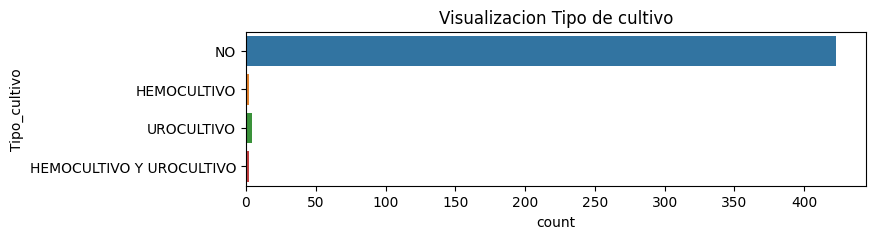

In [32]:
#Visualizamos los valores de el tipo de cultivo
plt.figure(figsize=(8,2))
sns.countplot(data=data,y='Tipo_cultivo',hue='Tipo_cultivo')
plt.title('Visualizacion Tipo de cultivo')
plt.show()

In [33]:
#Esta variable indica un 98.14% de "NO", sera eliminada 
conteo_cultivo =(data['Tipo_cultivo']=='NO').sum()
len_cultivo = len(data['Tipo_cultivo'])
print(f'Tenemos {round((conteo_cultivo/len_cultivo)*100,2)} % respuestas como "NO"')

Tenemos 98.14 % respuestas como "NO"


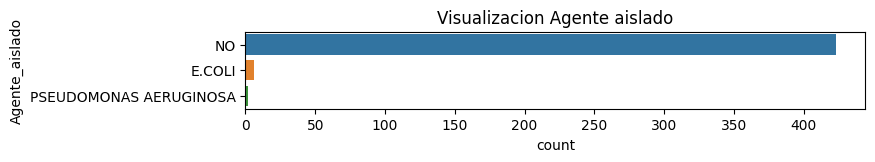

In [34]:
#Visualizamos los valores de agente aislado
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Agente_aislado',hue='Agente_aislado')
plt.title('Visualizacion Agente aislado')
plt.show()

In [35]:
#Esta variable indica un 98.14% de "NO", sera eliminada 
conteo_agente =(data['Agente_aislado']=='NO').sum()
len_agente = len(data['Agente_aislado'])
print(f'Tenemos {round((conteo_agente/len_agente)*100,2)} % respuestas como "NO"')

Tenemos 98.14 % respuestas como "NO"


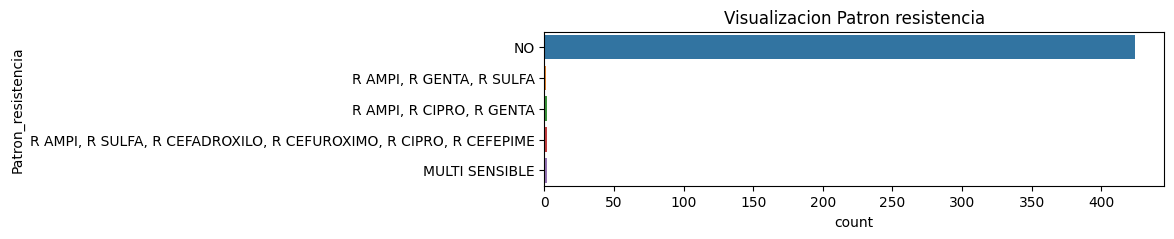

In [36]:
#Visualizamos los valores de patron resistencia
plt.figure(figsize=(8,2))
sns.countplot(data=data,y='Patron_resistencia',hue='Patron_resistencia')
plt.title('Visualizacion Patron resistencia')
plt.show()

In [37]:
#Esta variable indica un 98.38% de "NO", sera eliminada 
conteo_patron =(data['Patron_resistencia']=='NO').sum()
len_patron = len(data['Patron_resistencia'])
print(f'Tenemos {round((conteo_patron/len_patron)*100,2)} % respuestas como "NO"')

Tenemos 98.38 % respuestas como "NO"


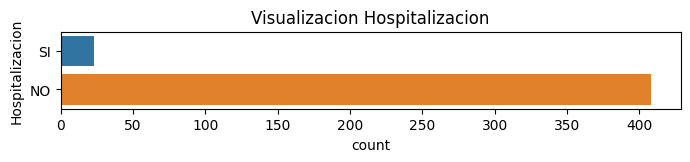

In [38]:
#Visualizamos los valores de hospitalizacion
plt.figure(figsize=(8,1))
sns.countplot(data=data,y='Hospitalizacion',hue='Hospitalizacion')
plt.title('Visualizacion Hospitalizacion')
plt.show()

In [39]:
#Se reviso todas las variables explicativas, aquellas que tenian un porcentaje mayor a 98% de los datos eran de una misma categoria ("NO"), se eliminaron
data = data.drop(columns=['Hospitaliz_ultimo_mes'])
data = data.drop(columns=['Cup'])
data = data.drop(columns=['Itu'])
data = data.drop(columns=['Tipo_cultivo'])
data = data.drop(columns=['Agente_aislado'])
data = data.drop(columns=['Patron_resistencia'])

In [40]:
#Corroboracion de que fueron eliminadas dichas columnas
data

,Edad,Diabetes,Psa,Biopsias_prev,Vol_prostatico,Antibiotico_profilaxis,Nro_muestras,Epoc,Biopsia,nro_dias_con_infecc,Fiebre,Hospitalizacion,Dias_hosp_mq
0,53,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,SI,2
1,56,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,SI,5
2,57,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,SI,4
3,56,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,1,SI,SI,5
4,55,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NEG,1,SI,SI,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,0
429,70,SI,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NEG,0,NO,NO,0
430,75,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,0
431,67,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,0


Algunas observaciones:
* **Diabetes, Hospitaliz_ultimo_mes, Biopsias_prev,Tipo de cultivo,Patron Resistencia, Agente aislado, Cup, Epoc, Fiebre, Biopsia y Hospitalizacion** tenemos gran cantidad de valores "NO"
* **Antibiotico profilaxis** tiene mayoria en FLUOROQUINOLONA_AMINOGLICOSIDO
* En **Biopsia** hay dos tipos de carcinoma que predominan: GLEASON 6 Y 7
* Hay muchos valores atipicos (**PSA**>30), segun la bibliografia y webgrafia que se consulto, no es normal que tengamos valores mayores a 10ng/Ml de **PSA**, pero se considero que esto si puede ser relevante para que determinemos si el paciente se hospitaliza o no, decidimos no borrar los datos

### Codificacion de los datos

In [41]:
#Se realizaron mapeos segun los valores que tenia cada columna y se los cambio por numero, los valores posibles son: Si = 1 y NO = 0, esto se hace para que el modelo que utilizaremos luego pueda interpretar los datos
mapeo_resto = {"NO":0, "SI":1}
data['Diabetes'] = data['Diabetes'].replace(mapeo_resto)
data['Biopsias_prev'] = data['Biopsias_prev'].replace(mapeo_resto)
data['Vol_prostatico'] = data['Vol_prostatico'].replace(mapeo_resto)
data['Epoc'] = data['Epoc'].replace(mapeo_resto)
data['Fiebre'] = data['Fiebre'].replace(mapeo_resto)
data['Hospitalizacion'] = data['Hospitalizacion'].replace(mapeo_resto)

In [42]:
#Mapeo de valores para los tipos de antibioticos
mapeo_antibiotico = {
    "FLUOROQUINOLONA_AMINOGLICOSIDO": 0,
    "CEFALOSPORINA_AMINOGLUCOCIDO": 1,
    "OROQUINOLONAS": 2,
    "OTROS": 3 }

data['Antibiotico_profilaxis'] = data['Antibiotico_profilaxis'].replace(mapeo_antibiotico)

In [43]:
#Mapeo de valores para los tipos de biopsia
mapeo_biopsia = {
    "NEG":0,
    "ADENOCARCINOMA GLEASON 7":1,
    "ADENOCARCINOMA GLEASON 6":2,
    "ADENOCARCINOMA GLEASON 8":3,
    "ADENOCARCINOMA GLEASON 9":4,
    "ADENOCARCINOMA GLEASON 10":5,
    "PROSTATITIS":6,
    "HIPERPLASIA PROSTATICA":7,
    "CARCINOMA INDIFERENCIADO DE CELULAS CLARAS":8 }

data['Biopsia'] = data['Biopsia'].replace(mapeo_biopsia)

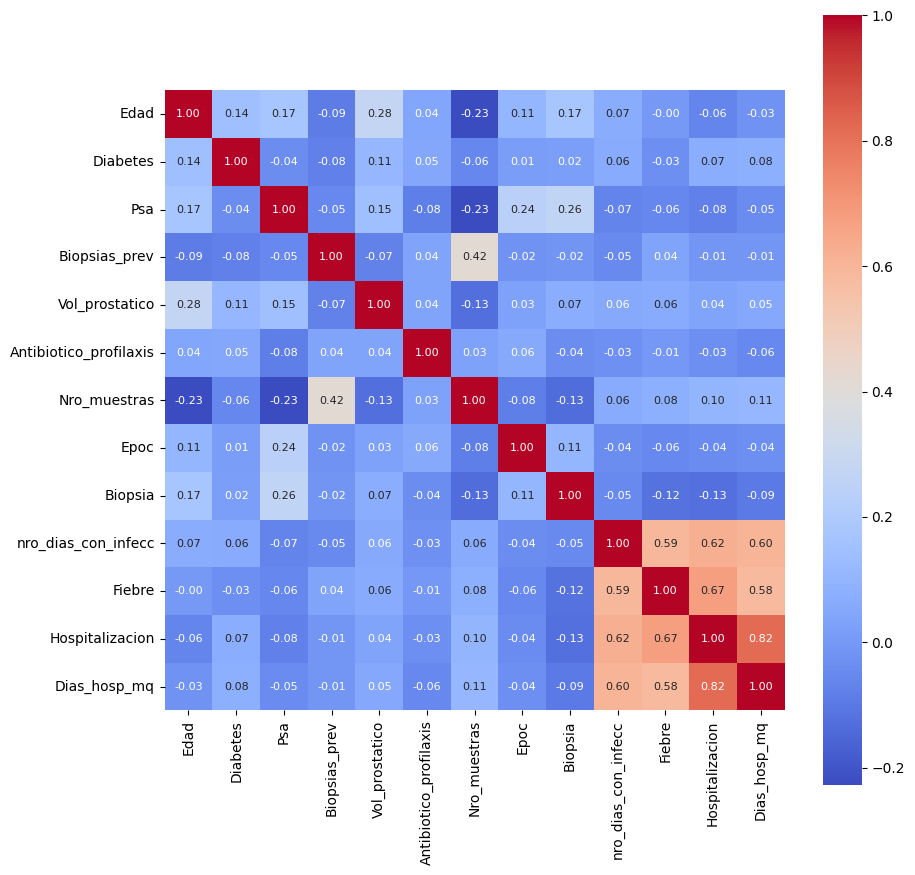

In [44]:
#Realizamos un grafico de correlaciones para ver la correlatividad entre las variables
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= data.columns,
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.show()

In [45]:
#Corroboracion de los ultimos dos mapeos
data

,Edad,Diabetes,Psa,Biopsias_prev,Vol_prostatico,Antibiotico_profilaxis,Nro_muestras,Epoc,Biopsia,nro_dias_con_infecc,Fiebre,Hospitalizacion,Dias_hosp_mq
0,53,0,4.0,0,1,0,12,0,0,1,1,1,2
1,56,0,7.7,0,1,0,12,0,0,1,1,1,5
2,57,0,29.0,1,1,0,24,0,0,1,1,1,4
3,56,0,7.0,0,1,0,12,0,0,1,1,1,5
4,55,0,29.0,1,1,0,24,0,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,0,12,0,1,0,0,0,0
429,70,1,18.0,0,1,0,12,0,0,0,0,0,0
430,75,0,75.0,0,1,0,12,0,3,0,0,0,0
431,67,0,6.0,0,1,0,12,0,2,0,0,0,0


### Exportamos los datos codificados

In [46]:
#Creamos un nuevo archivo desde nuestro data frame para trabajarlo con el modelo
data.to_csv('BBDD_hospitalizacion_codificado.csv',index=False,encoding='utf-8')

Desde [aqui](HospitalizacionModelo.ipynb) puede seguir hacia la ultima etapa (Modelo) 😃